Project context: https://www.theforage.com/modules/NkaC7knWtjSbi6aYv/4wnnynT6zRMPRjzSF?ref=tvikfrytzCFR8k4Gy

# Task 2: Experimentation and uplift testing

Extend your analysis from Task 1 to help you identify benchmark stores that allow you to test the impact of the trial store layouts on customer sales.

In [3]:
#import libraries
import numpy as np
import pandas as pd
import calendar
import re
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 
%matplotlib inline

Import data from csv file

In [13]:
trans_df = pd.read_csv('D:\\ProjectQuantium\\QVI_data.csv')

In [3]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [14]:
trans_df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


Check products with the term 'Salsa' and remove those which are not chips but sauce

In [48]:
trans_df[trans_df['PROD_NAME'].str.contains("salsa|Salsa")][['PROD_NAME','BRAND']].value_counts()

PROD_NAME                                 BRAND     
Old El Paso Salsa   Dip Chnky Tom Ht300g  OLD           3125
Old El Paso Salsa   Dip Tomato Med 300g   OLD           3114
Old El Paso Salsa   Dip Tomato Mild 300g  OLD           3085
Woolworths Mild     Salsa 300g            WOOLWORTHS    1491
Doritos Salsa Mild  300g                  DORITOS       1472
Smiths Crinkle Cut  Tomato Salsa 150g     SMITHS        1470
Red Rock Deli SR    Salsa & Mzzrlla 150g  RRD           1458
Doritos Salsa       Medium 300g           DORITOS       1449
Woolworths Medium   Salsa 300g            WOOLWORTHS    1430
dtype: int64

In [50]:
slsa_index = trans_df[trans_df['PROD_NAME'].str.contains("salsa|Salsa") & 
                          ((trans_df['BRAND']!="SMITHS")&(trans_df['BRAND']!="RRD"))].index

trans_df.drop(slsa_index,0,inplace=True)
trans_df.reset_index(drop=True,inplace=True)

<ipython-input-50-55cd5c8905a0>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trans_df.drop(slsa_index,0,inplace=True)


Add two separate columns for YEAR and MONTH 

In [15]:
trans_df['YEAR'] = pd.DatetimeIndex(trans_df['DATE']).year
trans_df['YEAR'] = trans_df['YEAR'].astype(str) 

trans_df['MONTH'] = pd.DatetimeIndex(trans_df['DATE']).month
trans_df['MONTH'] = trans_df['MONTH'].apply(lambda x: calendar.month_abbr[x])

Combine the months and years in another column MON_YR and drop the YEAR and MONTH columns

In [16]:
trans_df['MON_YR'] = trans_df.MONTH.str.cat(trans_df.YEAR ,sep='-') 
trans_df.drop(['MONTH','YEAR'],axis=1,inplace=True)

In [52]:
trans_df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MON_YR
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,Oct-2018
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,Sep-2018
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,Mar-2019
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,Mar-2019
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,Nov-2018


In [53]:
trans_df['MON_YR'].value_counts()

Dec-2018    21494
Mar-2019    21390
Jul-2018    21267
May-2019    21088
Aug-2018    21086
Oct-2018    20996
Jan-2019    20854
Jun-2019    20623
Nov-2018    20606
Apr-2019    20522
Sep-2018    20515
Feb-2019    19227
Name: MON_YR, dtype: int64

In [54]:
trans_df.to_csv("D:\\ProjectQuantium\\trans_df.csv",index=False)

In [55]:
trans_df.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER', 'MON_YR'],
      dtype='object')

In [56]:
trans_df['TXN_ID'].nunique()

248156

In [57]:
trans_df['LYLTY_CARD_NBR'].nunique()

71517

Compute the monthly sales, monthly number of transactions and monthly customer numbers for each store and put them in a separate dataframe

In [3]:
monthly_sales = trans_df[['MON_YR','STORE_NBR',
                          'TOT_SALES']].groupby(['MON_YR','STORE_NBR']).agg({'TOT_SALES':'sum'}).reset_index()

monthly_trans = trans_df[['MON_YR','STORE_NBR',
                          'TXN_ID']].drop_duplicates().groupby(['MON_YR','STORE_NBR']).size().reset_index(name='NO_OF_TRANS')

monthly_cust = trans_df[['MON_YR','STORE_NBR',
                         'LYLTY_CARD_NBR']].drop_duplicates().groupby(['MON_YR',
                                                                       'STORE_NBR']).size().reset_index(name='NO_OF_CUST')

In [4]:
monthly_data = pd.merge(monthly_sales, 
                        pd.merge(monthly_trans, monthly_cust, how="outer", on=['MON_YR','STORE_NBR']),
                        how="outer", on=['MON_YR','STORE_NBR'])

In [5]:
monthly_data.head()

,MON_YR,STORE_NBR,TOT_SALES,NO_OF_TRANS,NO_OF_CUST
0,Apr-2019,1,177.4,40,39
1,Apr-2019,2,176.0,46,44
2,Apr-2019,3,843.5,100,85
3,Apr-2019,4,1159.1,129,112
4,Apr-2019,5,700.2,104,81


Compute the monthly transactions per customer

In [6]:
monthly_data['TRANS_PER_CUST'] = monthly_data['NO_OF_TRANS']/monthly_data['NO_OF_CUST']
monthly_data['TRANS_PER_CUST'] = monthly_data['TRANS_PER_CUST'].round(2)

In [7]:
monthly_data.head()

,MON_YR,STORE_NBR,TOT_SALES,NO_OF_TRANS,NO_OF_CUST,TRANS_PER_CUST
0,Apr-2019,1,177.4,40,39,1.03
1,Apr-2019,2,176.0,46,44,1.05
2,Apr-2019,3,843.5,100,85,1.18
3,Apr-2019,4,1159.1,129,112,1.15
4,Apr-2019,5,700.2,104,81,1.28


Sort and order rows by Month and Year

In [8]:
monthly_data = monthly_data.sort_values('MON_YR', 
                    key=lambda s: s.apply(['Jul-2018','Aug-2018','Sep-2018','Oct-2018','Nov-2018','Dec-2018',
                                           'Jan-2019','Feb-2019','Mar-2019','Apr-2019','May-2019','Jun-2019'].index), 
                    ignore_index=True)

In [28]:
monthly_data.head()

,MON_YR,STORE_NBR,TOT_SALES,NO_OF_TRANS,NO_OF_CUST,TRANS_PER_CUST
0,Jul-2018,3,1164.9,134,108,1.24
1,Jul-2018,174,307.0,37,36,1.03
2,Jul-2018,175,954.4,114,99,1.15
3,Jul-2018,176,275.5,51,49,1.04
4,Jul-2018,177,9.6,3,3,1.00


Remove those store numbers that do not have sales for all months

In [29]:
for i in monthly_data['STORE_NBR'].unique():
    if monthly_data[monthly_data['STORE_NBR']== i]['MON_YR'].nunique() != 12:
        ix = monthly_data[monthly_data['STORE_NBR'] == i].index
        monthly_data.drop(ix,0,inplace=True) 

<ipython-input-29-5fff8ed67142>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  monthly_data.drop(ix,0,inplace=True)


In [30]:
monthly_data.reset_index(drop=True,inplace=True)

In [31]:
monthly_data.head()

,MON_YR,STORE_NBR,TOT_SALES,NO_OF_TRANS,NO_OF_CUST,TRANS_PER_CUST
0,Jul-2018,3,1164.9,134,108,1.24
1,Jul-2018,174,307.0,37,36,1.03
2,Jul-2018,175,954.4,114,99,1.15
3,Jul-2018,176,275.5,51,49,1.04
4,Jul-2018,178,933.6,128,105,1.22


## <br /><br /> 1. Analysis before Trial Period

Find total sales before trial period

In [38]:
before_trial = ['Jul-2018','Aug-2018','Sep-2018','Oct-2018','Nov-2018','Dec-2018','Jan-2019']
monthly_before_trial = monthly_data[monthly_data['MON_YR'].isin(before_trial)]
monthly_before_trial.head()

,MON_YR,STORE_NBR,TOT_SALES,NO_OF_TRANS,NO_OF_CUST,TRANS_PER_CUST
0,Jul-2018,3,1164.9,134,108,1.24
1,Jul-2018,174,307.0,37,36,1.03
2,Jul-2018,175,954.4,114,99,1.15
3,Jul-2018,176,275.5,51,49,1.04
4,Jul-2018,178,933.6,128,105,1.22


Find the total sales of the stores 77, 86 and 88

In [40]:
net_sales = monthly_before_trial[['STORE_NBR','TOT_SALES']].groupby('STORE_NBR').agg({'TOT_SALES':'sum'}).reset_index()
net_sales.head()

,STORE_NBR,TOT_SALES
0,1,1303.90
1,2,1059.80
2,3,7184.45
3,4,8576.20
4,5,5409.10


In [41]:
net_sales[(net_sales['STORE_NBR'] == 77) | (net_sales['STORE_NBR'] == 86) | (net_sales['STORE_NBR'] == 88)]

,STORE_NBR,TOT_SALES
72,77,1630.10
80,86,5864.45
82,88,8832.80


Calculate difference of total sales in all stores from total sales of stores 77, 86  and 88

In [46]:
net_sales['DIFF77'] = 0
net_sales['DIFF86'] = 0
net_sales['DIFF88'] = 0

In [47]:
for i in range(len(net_sales)):
    diff77 = net_sales[net_sales['STORE_NBR']==
                       77]['TOT_SALES'].values - net_sales[net_sales['STORE_NBR']==
                                                           net_sales['STORE_NBR'][i]]['TOT_SALES'].values
    
    diff86 = net_sales[net_sales['STORE_NBR']==
                       86]['TOT_SALES'].values - net_sales[net_sales['STORE_NBR']==
                                                           net_sales['STORE_NBR'][i]]['TOT_SALES'].values
    
    diff88 = net_sales[net_sales['STORE_NBR']==
                       88]['TOT_SALES'].values - net_sales[net_sales['STORE_NBR']==
                                                           net_sales['STORE_NBR'][i]]['TOT_SALES'].values
    
    net_sales['DIFF77'][i] = abs(diff77)
    net_sales['DIFF86'][i] = abs(diff86)
    net_sales['DIFF88'][i] = abs(diff88)  

<ipython-input-47-3664bb11a7d9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_sales['DIFF77'][i] = abs(diff77)
<ipython-input-47-3664bb11a7d9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_sales['DIFF86'][i] = abs(diff86)
<ipython-input-47-3664bb11a7d9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_sales['DIFF88'][i] = abs(diff88)


In [48]:
net_sales.head()

,STORE_NBR,TOT_SALES,DIFF77,DIFF86,DIFF88
0,1,1303.90,326.20,4560.55,7528.90
1,2,1059.80,570.30,4804.65,7773.00
2,3,7184.45,5554.35,1320.00,1648.35
3,4,8576.20,6946.10,2711.75,256.60
4,5,5409.10,3779.00,455.35,3423.70


Find stores with difference of 100 or less from store 77

In [65]:
str77 = set(net_sales[net_sales['DIFF77'] <= 100]['STORE_NBR'].values)
str77

{46, 77, 90, 187, 188, 195, 205, 220, 233}

Find stores with difference of 100 or less from store 86

In [64]:
str86 = set(net_sales[net_sales['DIFF86'] <= 100]['STORE_NBR'].values)
str86

{10, 30, 32, 48, 62, 86, 91, 97, 102, 105, 109, 138, 164, 180, 207, 221, 227}

Find stores with difference of 100 or less from store 88

In [63]:
str88 = set(net_sales[net_sales['DIFF88'] <= 100]['STORE_NBR'].values)
str88

{88, 165, 237}

Get all the considered store numbers and remove the other stores for similarity checking

In [66]:
allstr =  (str77.union(str86)).union(str88)
allstr

{10,
 30,
 32,
 46,
 48,
 62,
 77,
 86,
 88,
 90,
 91,
 97,
 102,
 105,
 109,
 138,
 164,
 165,
 180,
 187,
 188,
 195,
 205,
 207,
 220,
 221,
 227,
 233,
 237}

In [67]:
monthly_before_trial = monthly_data[monthly_data['STORE_NBR'].isin(allstr)]
monthly_before_trial.head()

,MON_YR,STORE_NBR,TOT_SALES,NO_OF_TRANS,NO_OF_CUST,TRANS_PER_CUST
6,Jul-2018,180,769.4,113,88,1.28
13,Jul-2018,187,238.6,40,37,1.08
14,Jul-2018,188,221.4,34,32,1.06
20,Jul-2018,195,224.9,44,43,1.02
56,Jul-2018,164,786.2,118,92,1.28


In [68]:
monthly_before_trial.reset_index(drop=True,inplace=True)
monthly_before_trial.head()

,MON_YR,STORE_NBR,TOT_SALES,NO_OF_TRANS,NO_OF_CUST,TRANS_PER_CUST
0,Jul-2018,180,769.4,113,88,1.28
1,Jul-2018,187,238.6,40,37,1.08
2,Jul-2018,188,221.4,34,32,1.06
3,Jul-2018,195,224.9,44,43,1.02
4,Jul-2018,164,786.2,118,92,1.28


Separate the trial stores and other stores in different dataframes

In [69]:
ts = monthly_before_trial[(monthly_before_trial['STORE_NBR'] == 77) | 
                          (monthly_before_trial['STORE_NBR'] == 86) | 
                          (monthly_before_trial['STORE_NBR'] == 88)].reset_index(drop=True)

In [70]:
ts.head()

,MON_YR,STORE_NBR,TOT_SALES,NO_OF_TRANS,NO_OF_CUST,TRANS_PER_CUST
0,Jul-2018,77,273.80,52,48,1.08
1,Jul-2018,86,861.40,122,95,1.28
2,Jul-2018,88,1218.20,144,124,1.16
3,Aug-2018,77,252.90,47,47,1.00
4,Aug-2018,86,737.65,106,93,1.14


In [85]:
ts['STORE_NBR'].unique()

array([77, 86, 88], dtype=int64)

In [79]:
os = monthly_before_trial[(monthly_before_trial['STORE_NBR'] != 77) & 
                          (monthly_before_trial['STORE_NBR'] != 86) & 
                          (monthly_before_trial['STORE_NBR'] != 88)].reset_index(drop=True)

os.head()

,MON_YR,STORE_NBR,TOT_SALES,NO_OF_TRANS,NO_OF_CUST,TRANS_PER_CUST
0,Jul-2018,180,769.4,113,88,1.28
1,Jul-2018,187,238.6,40,37,1.08
2,Jul-2018,188,221.4,34,32,1.06
3,Jul-2018,195,224.9,44,43,1.02
4,Jul-2018,164,786.2,118,92,1.28


In [84]:
os['STORE_NBR'].unique()

array([180, 187, 188, 195, 164, 165, 205, 207, 220, 221, 227, 233, 237,
        46,  48,  62, 138,  10,  30,  32, 109, 105,  97, 102,  91,  90],
      dtype=int64)

Find the most correlated stores to the trial stores 77, 86 and 88 in terms of monthly figures

In [80]:
ts['CORR_STORE'] = np.nan

In [88]:
def find_similar_store(stno):   
    for i in os['MON_YR'].unique():
        
        store_corr = dict()
        
        #for every month consider data of every other store with store number as index
        df1 = os[os['MON_YR']==i][['STORE_NBR','TOT_SALES','NO_OF_TRANS','NO_OF_CUST','TRANS_PER_CUST']].set_index('STORE_NBR')
        #transpose the dataframe
        df1 = df1.T
        
        #for every month consider data of every trial store with store number as index
        df2 = ts[(ts['STORE_NBR'] == stno) & (ts['MON_YR'] == i)][['STORE_NBR','TOT_SALES','NO_OF_TRANS',
                                                                   'NO_OF_CUST','TRANS_PER_CUST']].set_index('STORE_NBR')
        #transpose the dataframe
        df2 = df2.T
        
        #find the Pearson correlation of monthly figures of every other store with respect to those of trial store
        for j in range(len(df1.columns)):
            diff = abs(df1[df1.columns[j]] - df2[df2.columns[0]])
            store = df1.columns[j]
            corr = df1[df1.columns[j]].corr(df2[df2.columns[0]],method='pearson')           
            store_corr.update({store : corr})
        
        #take the store number with maximum correlation value for each month
        store_corrmax = max(store_corr, key=store_corr.get)
        
        ts['CORR_STORE'][(ts['STORE_NBR'] == stno) & (ts['MON_YR'] == i)] = store_corrmax

In [89]:
find_similar_store(77)
find_similar_store(86)
find_similar_store(88)

<ipython-input-88-5e9d9ff7b2fe>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['CORR_STORE'][(ts['STORE_NBR'] == stno) & (ts['MON_YR'] == i)] = store_corrmax
<ipython-input-88-5e9d9ff7b2fe>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['CORR_STORE'][(ts['STORE_NBR'] == stno) & (ts['MON_YR'] == i)] = store_corrmax
<ipython-input-88-5e9d9ff7b2fe>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['CORR_STORE'][(ts['STORE_N

<ipython-input-88-5e9d9ff7b2fe>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['CORR_STORE'][(ts['STORE_NBR'] == stno) & (ts['MON_YR'] == i)] = store_corrmax
<ipython-input-88-5e9d9ff7b2fe>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['CORR_STORE'][(ts['STORE_NBR'] == stno) & (ts['MON_YR'] == i)] = store_corrmax
<ipython-input-88-5e9d9ff7b2fe>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['CORR_STORE'][(ts['STORE_N

In [90]:
ts['CORR_STORE'] = ts['CORR_STORE'].astype('int') 

In [91]:
ts.head()

,MON_YR,STORE_NBR,TOT_SALES,NO_OF_TRANS,NO_OF_CUST,TRANS_PER_CUST,CORR_STORE
0,Jul-2018,77,273.80,52,48,1.08,233
1,Jul-2018,86,861.40,122,95,1.28,62
2,Jul-2018,88,1218.20,144,124,1.16,91
3,Aug-2018,77,252.90,47,47,1.00,46
4,Aug-2018,86,737.65,106,93,1.14,32


In [93]:
ts[ts['STORE_NBR'] == 77]['CORR_STORE'].value_counts()

46     4
220    3
233    2
205    2
195    1
Name: CORR_STORE, dtype: int64

In [94]:
ts[ts['STORE_NBR'] == 86]['CORR_STORE'].value_counts()

164    2
30     2
62     1
32     1
102    1
109    1
207    1
227    1
138    1
221    1
Name: CORR_STORE, dtype: int64

In [95]:
ts[ts['STORE_NBR'] == 88]['CORR_STORE'].value_counts()

165    6
237    4
91     2
Name: CORR_STORE, dtype: int64

Check store 46 with respect to trial store 77

In [53]:
monthly_before_trial[(monthly_before_trial['STORE_NBR'] == 77) | 
                     (monthly_before_trial['STORE_NBR'] == 46) |
                     (monthly_before_trial['STORE_NBR'] == 220)].head(6)

,MON_YR,STORE_NBR,TOT_SALES,NO_OF_TRANS,NO_OF_CUST,TRANS_PER_CUST
8,Jul-2018,220,227.2,45,44,1.02
13,Jul-2018,46,203.6,40,39,1.03
22,Jul-2018,77,273.8,52,48,1.08
36,Aug-2018,220,246.9,41,38,1.08
43,Aug-2018,46,237.7,44,42,1.05
51,Aug-2018,77,252.9,47,47,1.00


In [52]:
net_sales[(net_sales['STORE_NBR'] == 77) | (net_sales['STORE_NBR'] == 46) |
          (net_sales['STORE_NBR'] == 220)][['STORE_NBR','TOT_SALES']]

,STORE_NBR,TOT_SALES
42,46,1627.3
72,77,1630.1
207,220,1679.5


In [76]:
def check_plot_monthly(trialstore, otherstore, param, ylbl, colors):
    plt.figure(figsize=(24, 6))
    
    df = monthly_before_trial[(monthly_before_trial['STORE_NBR'] == trialstore) | 
                          (monthly_before_trial['STORE_NBR'] == otherstore)].reset_index(drop=True)
    
    ax = sns.catplot(data=df, x='MON_YR', y=param, kind="bar", hue='STORE_NBR', hue_order=[otherstore,trialstore],
                     palette=colors, order=['Jul-2018','Aug-2018','Sep-2018','Oct-2018','Nov-2018','Dec-2018','Jan-2019'], 
                     aspect=4, legend=False)
    #show values on top of bars
    for a in ax.axes.flat:
        a.bar_label(a.containers[0])
        a.bar_label(a.containers[1])
    
    plt.title('Comparison of '+str(ylbl)+' between store '+str(otherstore)+' and trial store '+str(trialstore), fontsize=15)
    ax.set(xlabel="",ylabel=ylbl)
    plt.legend(title='STORE NO.')

In [78]:
def plot_mean_line(trialstore, otherstore, param, colors):
    plt.axhline(y=monthly_before_trial[monthly_before_trial['STORE_NBR']==otherstore][param].mean(),
                color=colors[0],ls='--',lw=1.5)
    plt.axhline(y=monthly_before_trial[monthly_before_trial['STORE_NBR']==trialstore][param].mean(),
                color=colors[1],ls='--',lw=1.5)

In [46]:
def check_plot_netsales(trialstore, otherstore, colors):
    plt.figure(figsize=(5, 4))
    
    df = net_sales[(net_sales['STORE_NBR'] == trialstore) | (net_sales['STORE_NBR'] == otherstore)].reset_index(drop=True)
    df['STORE_NBR'] = df['STORE_NBR'].astype('category') 
    
    ax = sns.barplot(data=df, y='TOT_SALES', x=df['STORE_NBR'], hue='STORE_NBR',hue_order=[otherstore,trialstore],
                     palette=colors, dodge=False)
    ax.legend_.remove()
    
    plt.title('Net sales of store '+str(otherstore)+' and trial store '+str(trialstore)+' before trial period', 
              fontsize=10)
    ax.set(xlabel="",ylabel="Net Sales")
    # set the bar labels  
    for i in ax.containers:
        ax.bar_label(i,)

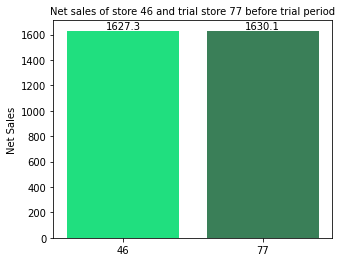

In [95]:
check_plot_netsales(77, 46, ['springgreen','seagreen'])
plt.savefig('D:\\ProjectQuantium\\Plots\\NetSales77-46.jpeg',bbox_inches='tight')

The net sales figures before trial period of trial store 77 and store 46 are very close.

**Hence store 46 is chosen as control store for store 77**

Check the monthly figures before trial period of store 77 and control store 46

In [63]:
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==77]['TOT_SALES'].mean())
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==46]['TOT_SALES'].mean())

241.04166666666674
233.18749999999997


<Figure size 1728x432 with 0 Axes>

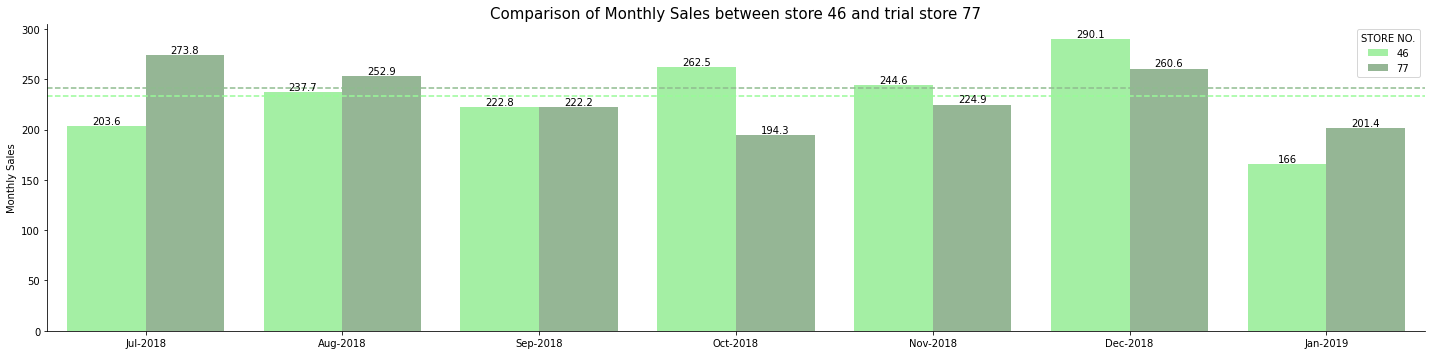

In [79]:
check_plot_monthly(77, 46, 'TOT_SALES', 'Monthly Sales', ['palegreen','darkseagreen'])
plot_mean_line(77, 46, 'TOT_SALES', ['palegreen','darkseagreen'])
plt.savefig('D:\\ProjectQuantium\\Plots\\MonthlySales77-46.jpeg',bbox_inches='tight')

In [64]:
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==77]['NO_OF_TRANS'].mean())
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==46]['NO_OF_TRANS'].mean())

45.0
41.333333333333336


<Figure size 1728x432 with 0 Axes>

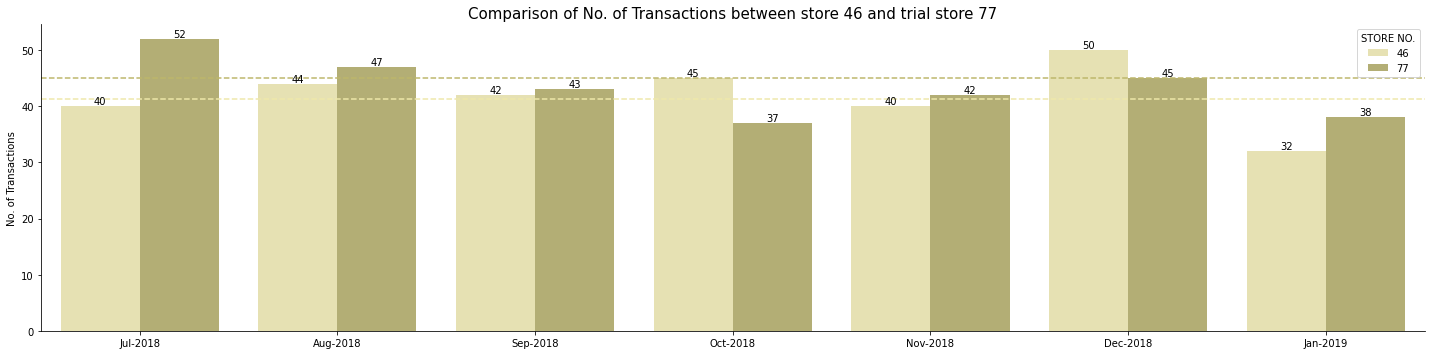

In [80]:
check_plot_monthly(77, 46, 'NO_OF_TRANS', 'No. of Transactions', ['palegoldenrod','darkkhaki'])
plot_mean_line(77, 46, 'NO_OF_TRANS', ['palegoldenrod','darkkhaki'])
plt.savefig('D:\\ProjectQuantium\\Plots\\MonthlyTrans77-46.jpeg',bbox_inches='tight')

In [65]:
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==77]['NO_OF_CUST'].mean())
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==46]['NO_OF_CUST'].mean())

43.0
39.916666666666664


<Figure size 1728x432 with 0 Axes>

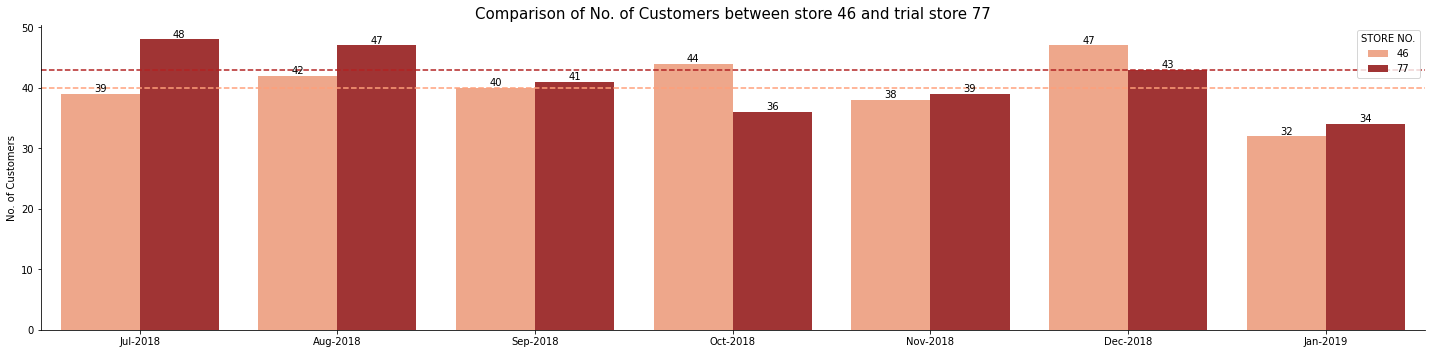

In [81]:
check_plot_monthly(77, 46, 'NO_OF_CUST', 'No. of Customers', ['lightsalmon','firebrick'])
plot_mean_line(77, 46, 'NO_OF_CUST', ['lightsalmon','firebrick'])
plt.savefig('D:\\ProjectQuantium\\Plots\\MonthlyCust77-46.jpeg',bbox_inches='tight')

In [66]:
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==77]['TRANS_PER_CUST'].mean())
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==46]['TRANS_PER_CUST'].mean())

1.0491666666666666
1.0350000000000001


<Figure size 1728x432 with 0 Axes>

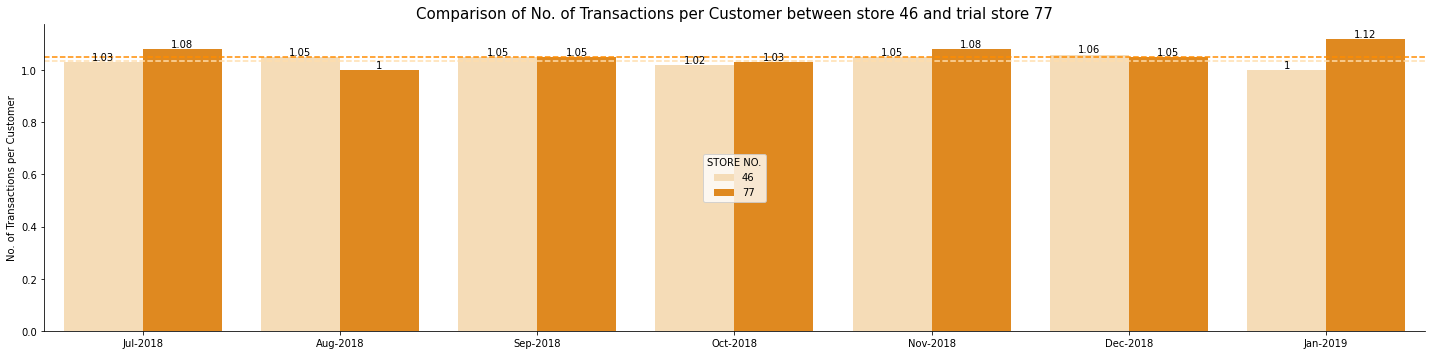

In [82]:
check_plot_monthly(77, 46, 'TRANS_PER_CUST', 'No. of Transactions per Customer', ['navajowhite','darkorange'])
plot_mean_line(77, 46, 'TRANS_PER_CUST', ['navajowhite','darkorange'])
plt.legend(title='STORE NO.',loc='center')
plt.savefig('D:\\ProjectQuantium\\Plots\\TransperCust77-46.jpeg',bbox_inches='tight')

Check stores 164 and 30 with respect to trial store 86

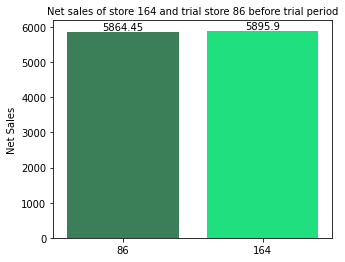

In [94]:
check_plot_netsales(86, 164, ['springgreen','seagreen'])
plt.savefig('D:\\ProjectQuantium\\Plots\\NetSales86-164.jpeg',bbox_inches='tight')

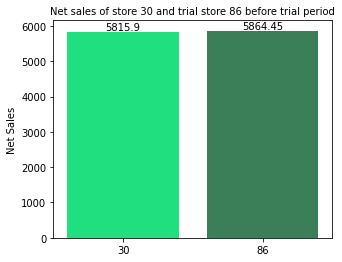

In [49]:
check_plot_netsales(86, 30, ['springgreen','seagreen'])

The net sales figures before trial period of trial store 86 and store 164 are closer.

**Hence store 164 is chosen as control store for store 86**

Check the monthly figures before trial period of store 86 and control store 164

In [67]:
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==86]['TOT_SALES'].mean())
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==164]['TOT_SALES'].mean())

845.4708333333333
839.65


<Figure size 1728x432 with 0 Axes>

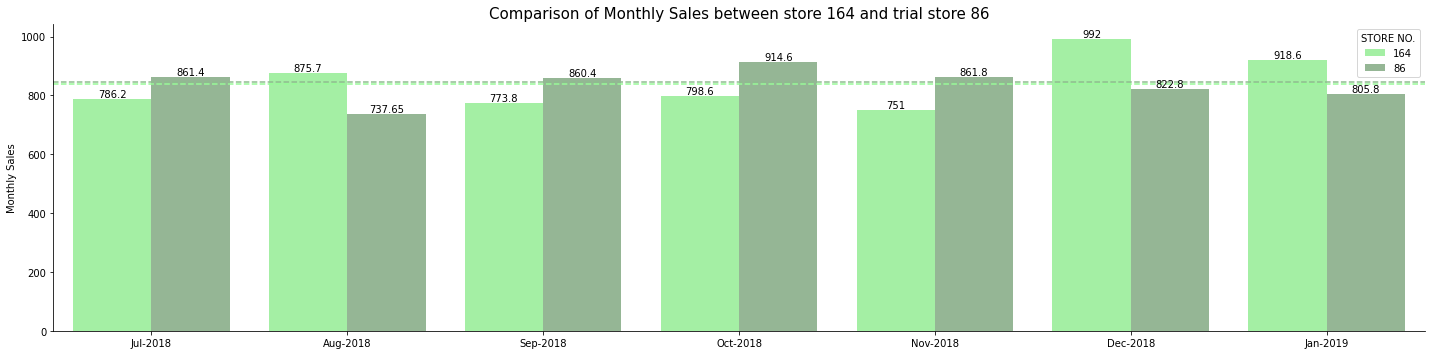

In [83]:
check_plot_monthly(86, 164, 'TOT_SALES', 'Monthly Sales', ['palegreen','darkseagreen'])
plot_mean_line(86, 164, 'TOT_SALES', ['palegreen','darkseagreen'])
plt.savefig('D:\\ProjectQuantium\\Plots\\MonthlySales86-164.jpeg',bbox_inches='tight')

In [68]:
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==86]['NO_OF_TRANS'].mean())
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==164]['NO_OF_TRANS'].mean())

121.25
120.5


<Figure size 1728x432 with 0 Axes>

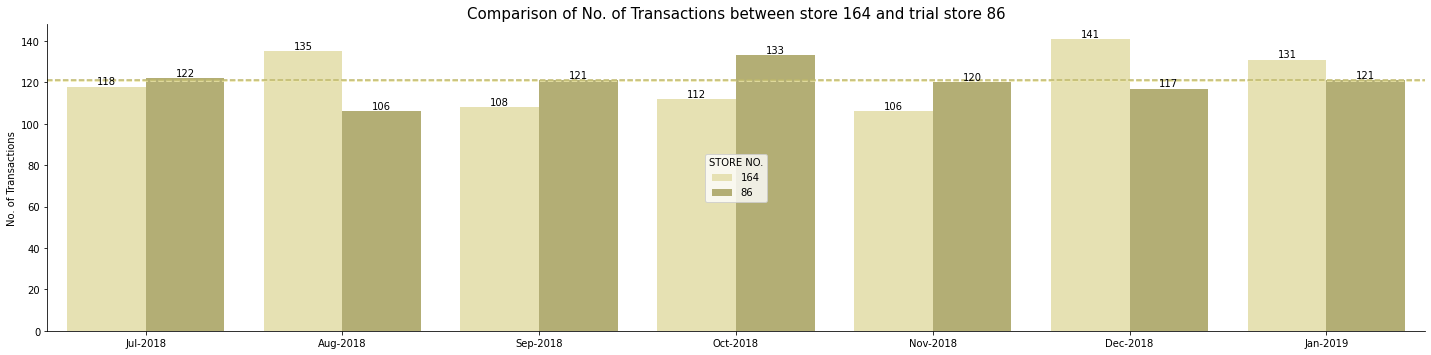

In [104]:
check_plot_monthly(86, 164, 'NO_OF_TRANS', 'No. of Transactions', ['palegoldenrod','darkkhaki'])
plot_mean_line(86, 164, 'NO_OF_TRANS', ['palegoldenrod','darkkhaki'])
plt.legend(title='STORE NO.', loc='center')
plt.savefig('D:\\ProjectQuantium\\Plots\\MonthlyTrans86-164.jpeg',bbox_inches='tight')

In [69]:
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==86]['NO_OF_CUST'].mean())
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==164]['NO_OF_CUST'].mean())

98.83333333333333
96.08333333333333


<Figure size 1728x432 with 0 Axes>

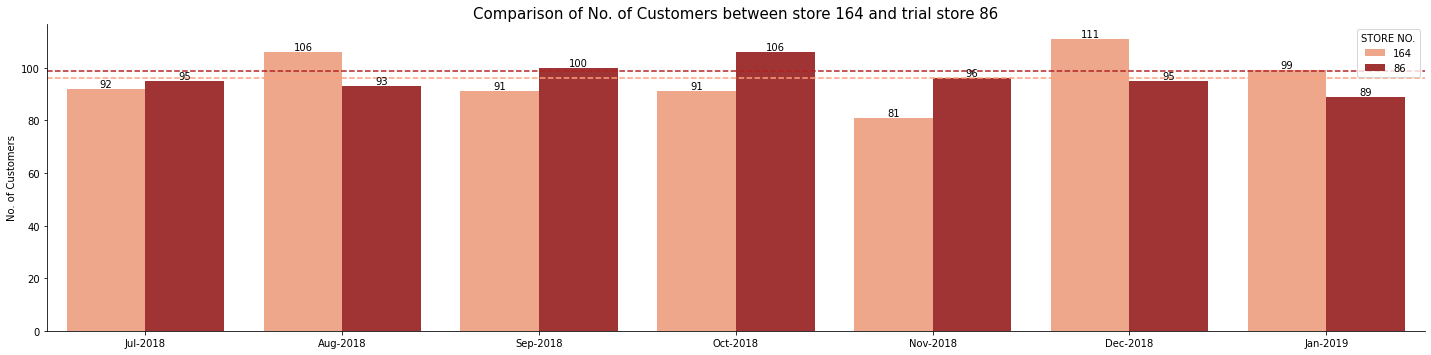

In [85]:
check_plot_monthly(86, 164, 'NO_OF_CUST', 'No. of Customers', ['lightsalmon','firebrick'])
plot_mean_line(86, 164, 'NO_OF_CUST', ['lightsalmon','firebrick'])
plt.savefig('D:\\ProjectQuantium\\Plots\\MonthlyCust86-164.jpeg',bbox_inches='tight')

In [70]:
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==86]['TRANS_PER_CUST'].mean())
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==164]['TRANS_PER_CUST'].mean())

1.2266666666666663
1.2516666666666667


<Figure size 1728x432 with 0 Axes>

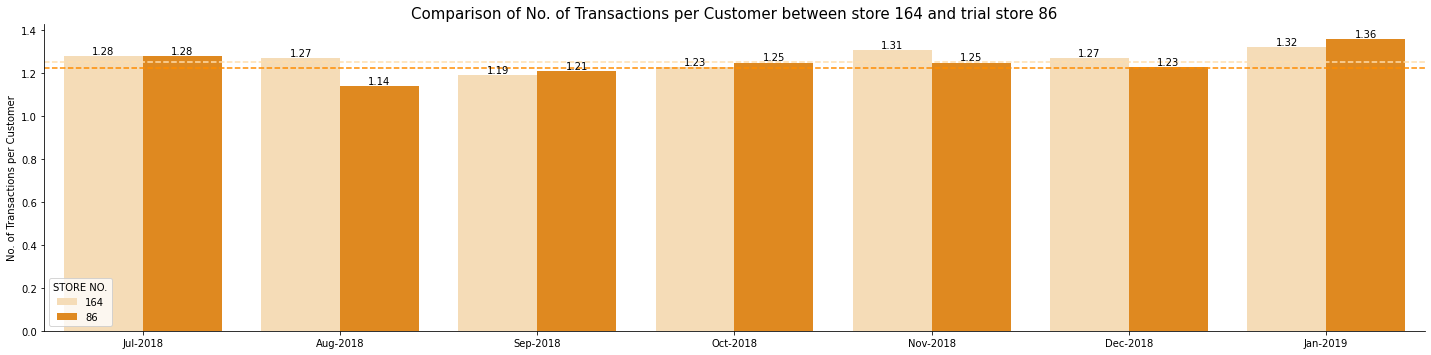

In [102]:
check_plot_monthly(86, 164, 'TRANS_PER_CUST', 'No. of Transactions per Customer', ['navajowhite','darkorange'])
plot_mean_line(86, 164, 'TRANS_PER_CUST', ['navajowhite','darkorange'])
plt.savefig('D:\\ProjectQuantium\\Plots\\TransperCust86-164.jpeg',bbox_inches='tight')

Check stores 165 and 237 with respect to trial store 88

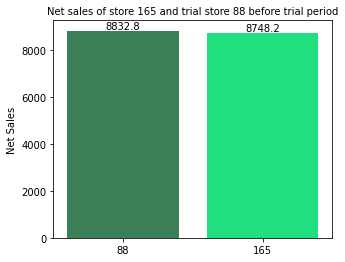

In [54]:
check_plot_netsales(88, 165, ['springgreen','seagreen'])

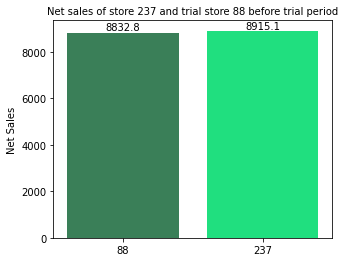

In [56]:
check_plot_netsales(88, 237, ['springgreen','seagreen'])
plt.savefig('D:\\ProjectQuantium\\Plots\\NetSales88-237.jpeg',bbox_inches='tight')

The net sales figures before trial period of trial store 88 and store 237 are closer.

**Hence store 237 is chosen as control store for store 88**

Check the monthly figures before trial period of store 88 and control store 237

In [89]:
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==88]['TOT_SALES'].mean())
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==237]['TOT_SALES'].mean())

1287.1541666666667
1235.8833333333334


<Figure size 1728x432 with 0 Axes>

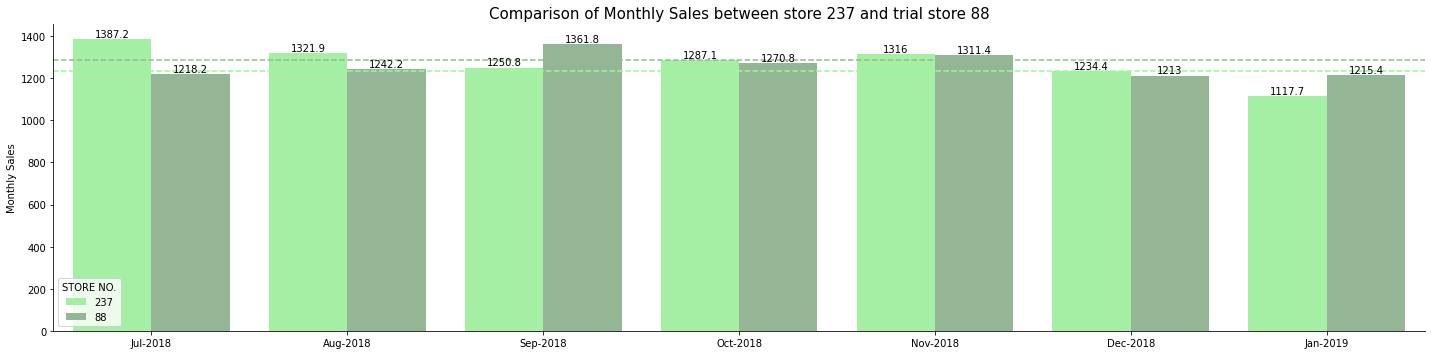

In [90]:
check_plot_monthly(88, 237, 'TOT_SALES', 'Monthly Sales', ['palegreen','darkseagreen'])
plot_mean_line(88, 237, 'TOT_SALES', ['palegreen','darkseagreen'])
plt.savefig('D:\\ProjectQuantium\\Plots\\MonthlySales88-237.jpeg',bbox_inches='tight')

In [91]:
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==88]['NO_OF_TRANS'].mean())
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==237]['NO_OF_TRANS'].mean())

147.58333333333334
141.83333333333334


<Figure size 1728x432 with 0 Axes>

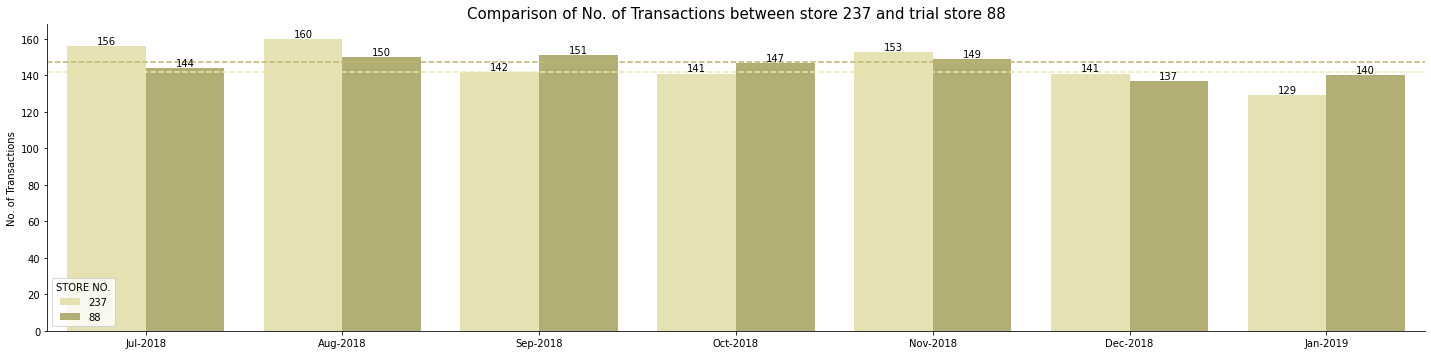

In [93]:
check_plot_monthly(88, 237, 'NO_OF_TRANS', 'No. of Transactions', ['palegoldenrod','darkkhaki'])
plot_mean_line(88, 237, 'NO_OF_TRANS', ['palegoldenrod','darkkhaki'])
plt.savefig('D:\\ProjectQuantium\\Plots\\MonthlyTrans88-237.jpeg',bbox_inches='tight')

In [96]:
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==88]['NO_OF_CUST'].mean())
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==237]['NO_OF_CUST'].mean())

121.5
120.25


<Figure size 1728x432 with 0 Axes>

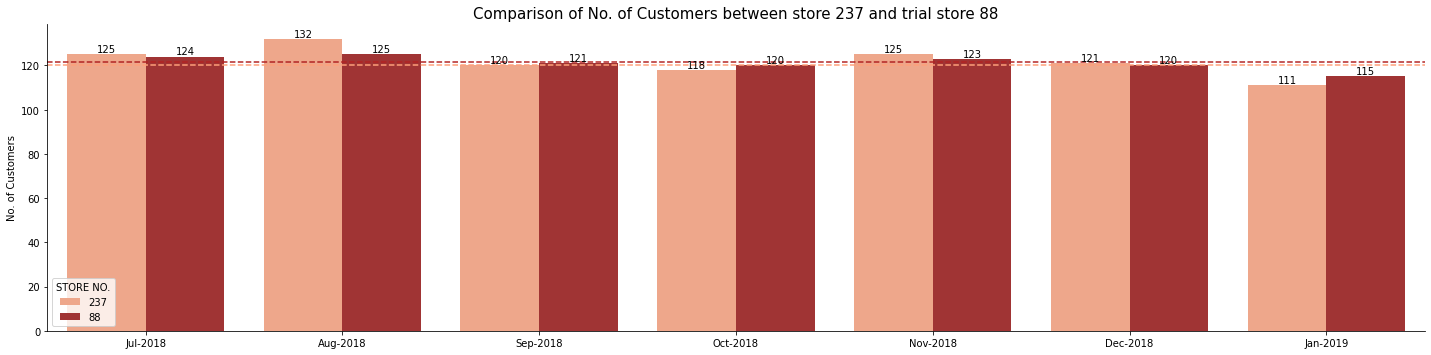

In [98]:
check_plot_monthly(88, 237, 'NO_OF_CUST', 'No. of Customers', ['lightsalmon','firebrick'])
plot_mean_line(88, 237, 'NO_OF_CUST', ['lightsalmon','firebrick'])
plt.savefig('D:\\ProjectQuantium\\Plots\\MonthlyCust88-237.jpeg',bbox_inches='tight')

In [99]:
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==88]['TRANS_PER_CUST'].mean())
print(monthly_before_trial[monthly_before_trial['STORE_NBR']==237]['TRANS_PER_CUST'].mean())

1.215
1.1775


<Figure size 1728x432 with 0 Axes>

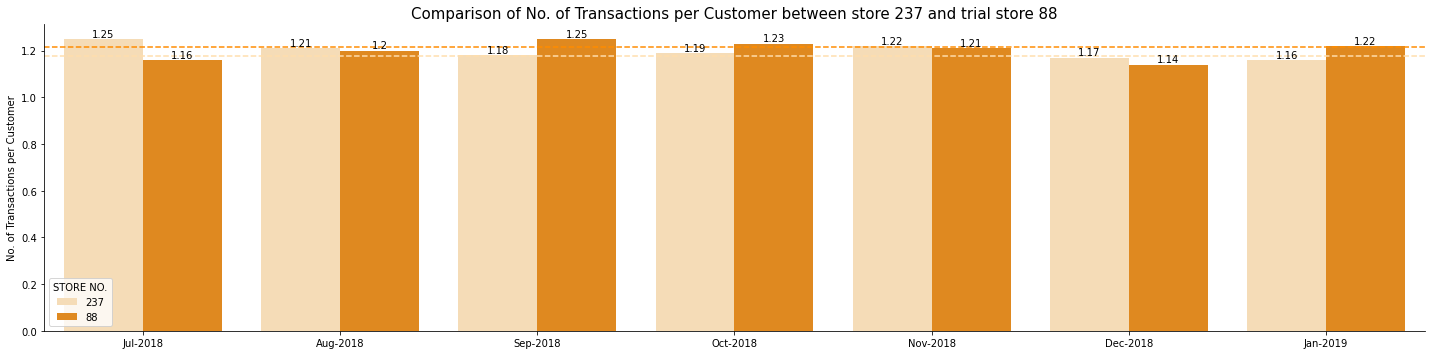

In [101]:
check_plot_monthly(88, 237, 'TRANS_PER_CUST', 'No. of Transactions per Customer', ['navajowhite','darkorange'])
plot_mean_line(88, 237, 'TRANS_PER_CUST', ['navajowhite','darkorange'])
plt.savefig('D:\\ProjectQuantium\\Plots\\TransperCust88-237.jpeg',bbox_inches='tight')

## <br /><br /> 2. Analysis during Trial Period

In [107]:
monthly_data.head()

,MON_YR,STORE_NBR,TOT_SALES,NO_OF_TRANS,NO_OF_CUST,TRANS_PER_CUST
0,Jul-2018,3,1164.9,134,108,1.24
1,Jul-2018,174,307.0,37,36,1.03
2,Jul-2018,175,954.4,114,99,1.15
3,Jul-2018,176,275.5,51,49,1.04
4,Jul-2018,178,933.6,128,105,1.22


In [128]:
trial = ['Feb-2019','Mar-2019','Apr-2019']
trlcntrl_strs = [77,86,88,46,164,237]
monthly_from_trial = monthly_data[monthly_data['MON_YR'].isin(trial)][monthly_data['STORE_NBR'].isin(trlcntrl_strs)]

<ipython-input-128-b19f38cfc03c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  monthly_from_trial = monthly_data[monthly_data['MON_YR'].isin(trial)][monthly_data['STORE_NBR'].isin(trlcntrl_strs)]


In [130]:
monthly_from_trial.reset_index(drop=True,inplace=True)
monthly_from_trial.head()

,MON_YR,STORE_NBR,TOT_SALES,NO_OF_TRANS,NO_OF_CUST,TRANS_PER_CUST
0,Feb-2019,164,728.2,101,89,1.13
1,Feb-2019,237,1313.0,148,119,1.24
2,Feb-2019,46,196.8,35,35,1.00
3,Feb-2019,77,222.2,43,43,1.00
4,Feb-2019,86,888.8,133,106,1.25


In [235]:
def check_plot_monthlytrial(trialstore, otherstore, param, ylbl, colors):
    plt.figure(figsize=(6, 2))  
    stores = [trialstore,otherstore]
    
    df = monthly_from_trial[monthly_from_trial['STORE_NBR'].isin(stores)].reset_index(drop=True)
    ax = sns.catplot(data=df, x='MON_YR', y=param, kind="bar", hue='STORE_NBR', hue_order=[otherstore,trialstore],
                     palette=colors, order=['Feb-2019','Mar-2019','Apr-2019'],aspect=1.25,legend=False)
    plt.title('Control store '+str(otherstore)+' and Trial store '+str(trialstore)+'\n'+str(ylbl)+' during trial period')
    ax.set(xlabel="",ylabel=ylbl)
    plt.legend(title='STORE NO.')
    #show values on top of bars
    for a in ax.axes.flat:
        a.bar_label(a.containers[0])
        a.bar_label(a.containers[1])
       
    plt.tight_layout()

In [236]:
def plot_mean_linetrial(trialstore, otherstore, param, colors):
    plt.axhline(y=monthly_from_trial[monthly_from_trial['STORE_NBR']==otherstore][param].mean(),
                color=colors[0],ls='--',lw=1.5)
    plt.axhline(y=monthly_from_trial[monthly_from_trial['STORE_NBR']==trialstore][param].mean(),
                color=colors[1],ls='--',lw=1.5)

246.9333333333333
232.5


<Figure size 432x144 with 0 Axes>

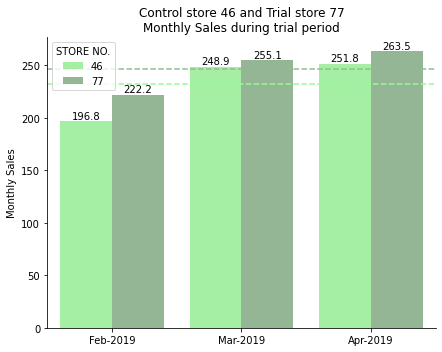

In [238]:
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==77]['TOT_SALES'].mean())
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==46]['TOT_SALES'].mean())

check_plot_monthlytrial(77, 46, 'TOT_SALES', 'Monthly Sales', ['palegreen','darkseagreen'])
plot_mean_linetrial(77, 46, 'TOT_SALES', ['palegreen','darkseagreen'])
plt.savefig('D:\\ProjectQuantium\\Plots\\MonthlySalesTrial77-46.jpeg',bbox_inches='tight')

47.333333333333336
40.0


<Figure size 432x144 with 0 Axes>

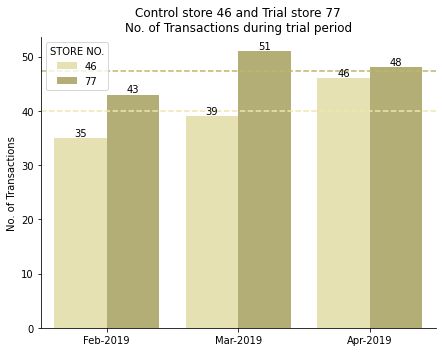

In [240]:
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==77]['NO_OF_TRANS'].mean())
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==46]['NO_OF_TRANS'].mean())

check_plot_monthlytrial(77, 46, 'NO_OF_TRANS', 'No. of Transactions', ['palegoldenrod','darkkhaki'])
plot_mean_linetrial(77, 46, 'NO_OF_TRANS', ['palegoldenrod','darkkhaki'])
plt.savefig('D:\\ProjectQuantium\\Plots\\MonthlyTransTrial77-46.jpeg',bbox_inches='tight')

45.333333333333336
39.333333333333336


<Figure size 432x144 with 0 Axes>

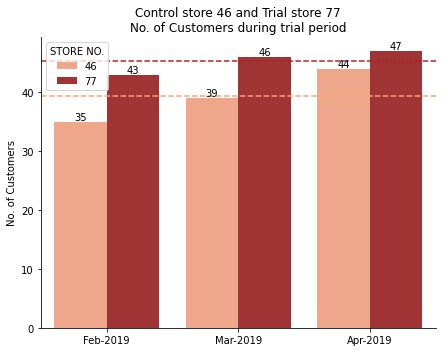

In [242]:
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==77]['NO_OF_CUST'].mean())
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==46]['NO_OF_CUST'].mean())

check_plot_monthlytrial(77, 46, 'NO_OF_CUST', 'No. of Customers', ['lightsalmon','firebrick'])
plot_mean_linetrial(77, 46, 'NO_OF_CUST', ['lightsalmon','firebrick'])
plt.savefig('D:\\ProjectQuantium\\Plots\\MonthlyCustTrial77-46.jpeg',bbox_inches='tight')

1.0433333333333334
1.0166666666666666


<Figure size 432x144 with 0 Axes>

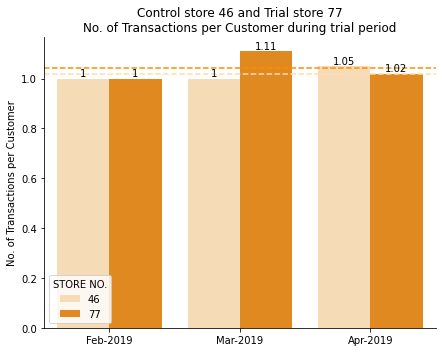

In [244]:
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==77]['TRANS_PER_CUST'].mean())
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==46]['TRANS_PER_CUST'].mean())

check_plot_monthlytrial(77, 46, 'TRANS_PER_CUST', 'No. of Transactions per Customer', ['navajowhite','darkorange'])
plot_mean_linetrial(77, 46, 'TRANS_PER_CUST', ['navajowhite','darkorange'])
plt.savefig('D:\\ProjectQuantium\\Plots\\TransperCustTrial77-46.jpeg',bbox_inches='tight')

888.1333333333333
876.1333333333333


<Figure size 432x144 with 0 Axes>

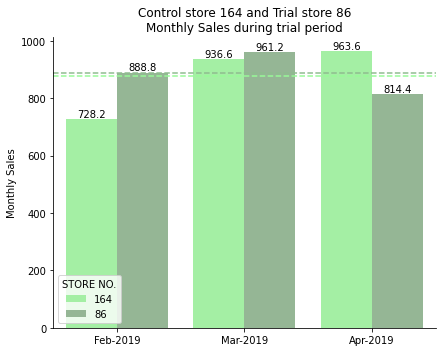

In [245]:
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==86]['TOT_SALES'].mean())
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==164]['TOT_SALES'].mean())

check_plot_monthlytrial(86, 164, 'TOT_SALES', 'Monthly Sales', ['palegreen','darkseagreen'])
plot_mean_linetrial(86, 164, 'TOT_SALES', ['palegreen','darkseagreen'])
plt.savefig('D:\\ProjectQuantium\\Plots\\MonthlySalesTrial86-164.jpeg',bbox_inches='tight')

128.0
121.33333333333333


<Figure size 432x144 with 0 Axes>

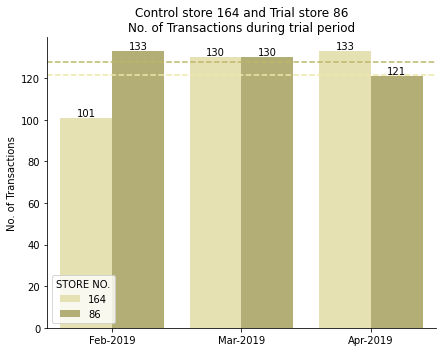

In [246]:
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==86]['NO_OF_TRANS'].mean())
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==164]['NO_OF_TRANS'].mean())

check_plot_monthlytrial(86, 164, 'NO_OF_TRANS', 'No. of Transactions', ['palegoldenrod','darkkhaki'])
plot_mean_linetrial(86, 164, 'NO_OF_TRANS', ['palegoldenrod','darkkhaki'])
plt.savefig('D:\\ProjectQuantium\\Plots\\MonthlyTransTrial86-164.jpeg',bbox_inches='tight')

105.66666666666667
97.33333333333333


<Figure size 432x144 with 0 Axes>

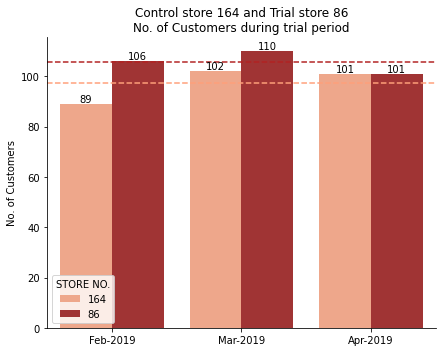

In [247]:
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==86]['NO_OF_CUST'].mean())
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==164]['NO_OF_CUST'].mean())

check_plot_monthlytrial(86, 164, 'NO_OF_CUST', 'No. of Customers', ['lightsalmon','firebrick'])
plot_mean_linetrial(86, 164, 'NO_OF_CUST', ['lightsalmon','firebrick'])
plt.savefig('D:\\ProjectQuantium\\Plots\\MonthlyCustTrial86-164.jpeg',bbox_inches='tight')

1.21
1.24


<Figure size 432x144 with 0 Axes>

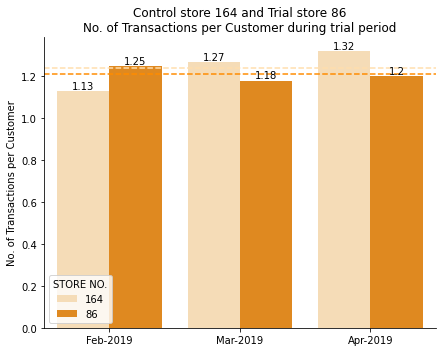

In [248]:
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==86]['TRANS_PER_CUST'].mean())
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==164]['TRANS_PER_CUST'].mean())

check_plot_monthlytrial(86, 164, 'TRANS_PER_CUST', 'No. of Transactions per Customer', ['navajowhite','darkorange'])
plot_mean_linetrial(86, 164, 'TRANS_PER_CUST', ['navajowhite','darkorange'])
plt.savefig('D:\\ProjectQuantium\\Plots\\TransperCustTrial86-164.jpeg',bbox_inches='tight')

1374.5333333333335
1214.7333333333333


<Figure size 432x144 with 0 Axes>

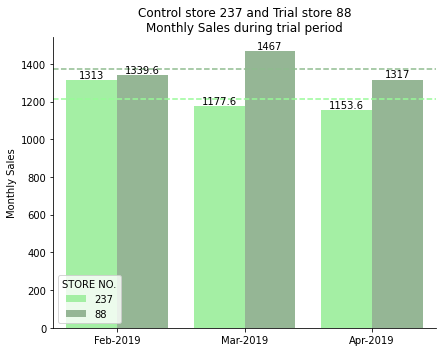

In [252]:
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==88]['TOT_SALES'].mean())
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==237]['TOT_SALES'].mean())

check_plot_monthlytrial(88, 237, 'TOT_SALES', 'Monthly Sales', ['palegreen','darkseagreen'])
plot_mean_linetrial(88, 237, 'TOT_SALES', ['palegreen','darkseagreen'])
plt.legend(title='STORE NO.', loc='lower left')
plt.savefig('D:\\ProjectQuantium\\Plots\\MonthlySalesTrial88-237.jpeg',bbox_inches='tight')

156.0
136.33333333333334


<Figure size 432x144 with 0 Axes>

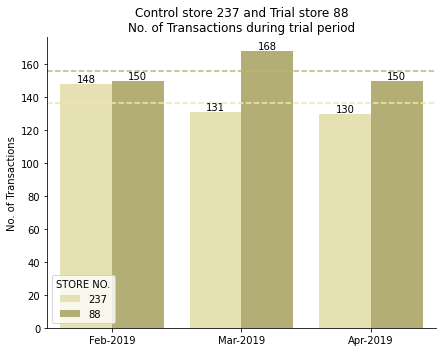

In [254]:
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==88]['NO_OF_TRANS'].mean())
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==237]['NO_OF_TRANS'].mean())

check_plot_monthlytrial(88, 237, 'NO_OF_TRANS', 'No. of Transactions', ['palegoldenrod','darkkhaki'])
plot_mean_linetrial(88, 237, 'NO_OF_TRANS', ['palegoldenrod','darkkhaki'])
plt.legend(title='STORE NO.', loc='lower left')
plt.savefig('D:\\ProjectQuantium\\Plots\\MonthlyTransTrial88-237.jpeg',bbox_inches='tight')

124.66666666666667
117.0


<Figure size 432x144 with 0 Axes>

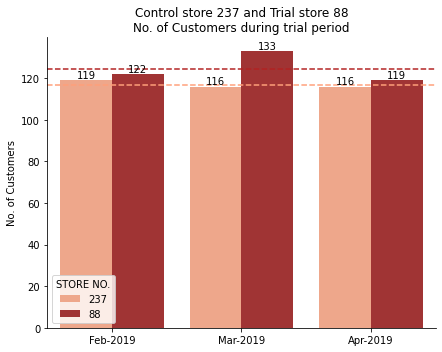

In [255]:
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==88]['NO_OF_CUST'].mean())
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==237]['NO_OF_CUST'].mean())

check_plot_monthlytrial(88, 237, 'NO_OF_CUST', 'No. of Customers', ['lightsalmon','firebrick'])
plot_mean_linetrial(88, 237, 'NO_OF_CUST', ['lightsalmon','firebrick'])
plt.savefig('D:\\ProjectQuantium\\Plots\\MonthlyCustTrial88-237.jpeg',bbox_inches='tight')

1.25
1.1633333333333333


<Figure size 432x144 with 0 Axes>

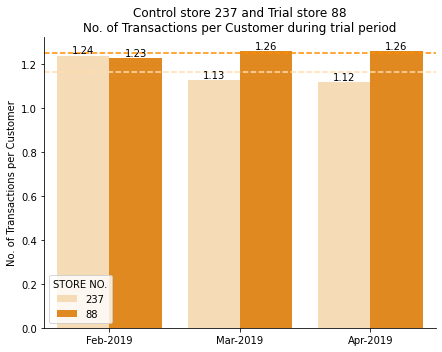

In [256]:
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==88]['TRANS_PER_CUST'].mean())
print(monthly_from_trial[monthly_from_trial['STORE_NBR']==237]['TRANS_PER_CUST'].mean())

check_plot_monthlytrial(88, 237, 'TRANS_PER_CUST', 'No. of Transactions per Customer', ['navajowhite','darkorange'])
plot_mean_linetrial(88, 237, 'TRANS_PER_CUST', ['navajowhite','darkorange'])
plt.savefig('D:\\ProjectQuantium\\Plots\\TransperCustTrial88-237.jpeg',bbox_inches='tight')

Compare the monthly average figures before and during trial period

In [264]:
trlcntrl_strs = [77,86,88,46,164,237]
mbt = monthly_before_trial[monthly_before_trial['STORE_NBR'].isin(trlcntrl_strs)].reset_index(drop=True)
mbt = mbt.drop('MON_YR',axis=1)
mbt = mbt.groupby(['STORE_NBR']).agg({'TOT_SALES':'mean','NO_OF_TRANS':'mean',
                                      'NO_OF_CUST':'mean','TRANS_PER_CUST':'mean'}).reset_index()
mbt['STATUS']="Before Trial"
mbt

,STORE_NBR,TOT_SALES,NO_OF_TRANS,NO_OF_CUST,TRANS_PER_CUST,STATUS
0,46,233.187500,41.333333,39.916667,1.035000,Before Trial
1,77,241.041667,45.000000,43.000000,1.049167,Before Trial
2,86,845.470833,121.250000,98.833333,1.226667,Before Trial
3,88,1287.154167,147.583333,121.500000,1.215000,Before Trial
4,164,839.650000,120.500000,96.083333,1.251667,Before Trial
5,237,1235.883333,141.833333,120.250000,1.177500,Before Trial


In [266]:
mft = monthly_from_trial.drop('MON_YR',axis=1)
mft = mft.groupby(['STORE_NBR']).agg({'TOT_SALES':'mean','NO_OF_TRANS':'mean',
                                      'NO_OF_CUST':'mean','TRANS_PER_CUST':'mean'}).reset_index()
mft['STATUS']="Trial Period"
mft

,STORE_NBR,TOT_SALES,NO_OF_TRANS,NO_OF_CUST,TRANS_PER_CUST,STATUS
0,46,232.500000,40.000000,39.333333,1.016667,Trial Period
1,77,246.933333,47.333333,45.333333,1.043333,Trial Period
2,86,888.133333,128.000000,105.666667,1.210000,Trial Period
3,88,1374.533333,156.000000,124.666667,1.250000,Trial Period
4,164,876.133333,121.333333,97.333333,1.240000,Trial Period
5,237,1214.733333,136.333333,117.000000,1.163333,Trial Period


In [270]:
mt = pd.concat([mbt,mft]).reset_index(drop=True)
mt

,STORE_NBR,TOT_SALES,NO_OF_TRANS,NO_OF_CUST,TRANS_PER_CUST,STATUS
0,46,233.187500,41.333333,39.916667,1.035000,Before Trial
1,77,241.041667,45.000000,43.000000,1.049167,Before Trial
2,86,845.470833,121.250000,98.833333,1.226667,Before Trial
3,88,1287.154167,147.583333,121.500000,1.215000,Before Trial
4,164,839.650000,120.500000,96.083333,1.251667,Before Trial
5,237,1235.883333,141.833333,120.250000,1.177500,Before Trial
6,46,232.500000,40.000000,39.333333,1.016667,Trial Period
7,77,246.933333,47.333333,45.333333,1.043333,Trial Period
8,86,888.133333,128.000000,105.666667,1.210000,Trial Period
9,88,1374.533333,156.000000,124.666667,1.250000,Trial Period


In [296]:
mt_pct = mt[['STORE_NBR']]
mt_pct = mt_pct.drop_duplicates()
mt_pct['PCT_TOT_SALES'] = 0
mt_pct['PCT_NO_OF_TRANS'] = 0
mt_pct['PCT_NO_OF_CUST'] = 0
mt_pct['PCT_TRANS_PER_CUST'] = 0
mt_pct

,STORE_NBR,PCT_TOT_SALES,PCT_NO_OF_TRANS,PCT_NO_OF_CUST,PCT_TRANS_PER_CUST
0,46,0,0,0,0
1,77,0,0,0,0
2,86,0,0,0,0
3,88,0,0,0,0
4,164,0,0,0,0
5,237,0,0,0,0


In [311]:
def get_pctchange_trial(df,col):
    tp = df[df['STATUS']=='Trial Period'][col].values 
    btp = df[df['STATUS']=='Before Trial'][col].values   
    chng = ((tp - btp)/btp)*100
    
    return chng.round(2)

In [312]:
for i in range(len(mt_pct)):
    df = mt[mt['STORE_NBR']==mt_pct['STORE_NBR'][i]]
    mt_pct['PCT_TOT_SALES'][i] = get_pctchange_trial(df,'TOT_SALES')
    mt_pct['PCT_NO_OF_TRANS'][i] = get_pctchange_trial(df,'NO_OF_TRANS')
    mt_pct['PCT_NO_OF_CUST'][i] = get_pctchange_trial(df,'NO_OF_CUST')
    mt_pct['PCT_TRANS_PER_CUST'][i] = get_pctchange_trial(df,'TRANS_PER_CUST')

In [6]:
mt_pct

,STORE_NBR,PCT_TOT_SALES,PCT_NO_OF_TRANS,PCT_NO_OF_CUST,PCT_TRANS_PER_CUST
0,46,-0.29,-3.23,-1.46,-1.77
1,77,2.44,5.19,5.43,-0.56
2,86,5.05,5.57,6.91,-1.36
3,88,6.79,5.70,2.61,2.88
4,164,4.35,0.69,1.30,-0.93
5,237,-1.71,-3.88,-2.70,-1.20


In [89]:
def plot_avg_chng(trialstore, otherstore):
    fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
    fig.suptitle('Comparison of Average Monthly Figures Before and During Trial Period')
    
    df1 = mt[mt['STORE_NBR']==trialstore]
    df2 = mt[mt['STORE_NBR']==otherstore]
    
    df11 = mt_pct[mt_pct['STORE_NBR']==trialstore]
    df22 = mt_pct[mt_pct['STORE_NBR']==otherstore]
    
    ax[0,0].set_title('Average Monthly Sales')
    ax[0,0].plot('STATUS', 'TOT_SALES', data=df1, label='Trial Store: '+str(trialstore),
                 marker='s', color='darkseagreen', linestyle=(0, (5, 5)))
    ax[0,0].text(0.15, 0.5, 'Trial Store Change: '+str(df11['PCT_TOT_SALES'].values[0])+'%', transform=ax[0,0].transAxes)
    ax[0,0].plot('STATUS', 'TOT_SALES', data=df2, label='Control Store: '+str(otherstore),
                 marker='o',color='palegreen',linestyle=(0, (5, 5)))
    ax[0,0].text(0.15, 0.4, 'Control Store Change: '+str(df22['PCT_TOT_SALES'].values[0])+'%', transform=ax[0,0].transAxes)
    ax[0,0].legend(loc="best")
    ax[0,0].set(ylabel="", xlabel="")
    
    ax[0,1].set_title('Average Monthly No. of Transactions')
    ax[0,1].plot('STATUS','NO_OF_TRANS',data=df1, label='Trial Store: '+str(trialstore),
                 marker='s',color='darkkhaki',linestyle=(0, (5, 5)))
    ax[0,1].text(0.15, 0.5, 'Trial Store Change: '+str(df11['PCT_NO_OF_TRANS'].values[0])+'%', transform=ax[0,1].transAxes)
    ax[0,1].plot('STATUS','NO_OF_TRANS',data=df2, label='Control Store: '+str(otherstore),
                 marker='s',color='palegoldenrod',linestyle=(0, (5, 5)))
    ax[0,1].text(0.15, 0.4, 'Control Store Change: '+str(df22['PCT_NO_OF_TRANS'].values[0])+'%', transform=ax[0,1].transAxes)
    ax[0,1].legend(loc="best")
    ax[0,1].set(ylabel="", xlabel="")
    
    ax[1,0].set_title('Average Monthly No. of Customers')
    ax[1,0].plot('STATUS','NO_OF_CUST',data=df1, label='Trial Store: '+str(trialstore),
                 marker='s',color='firebrick',linestyle=(0, (5, 5)))
    ax[1,0].text(0.15, 0.5, 'Trial Store Change: '+str(df11['PCT_NO_OF_CUST'].values[0])+'%', transform=ax[1,0].transAxes)
    ax[1,0].plot('STATUS','NO_OF_CUST',data=df2, label='Control Store: '+str(otherstore),
                 marker='s',color='lightsalmon',linestyle=(0, (5, 5)))
    ax[1,0].text(0.15, 0.4, 'Control Store Change: '+str(df22['PCT_NO_OF_CUST'].values[0])+'%', transform=ax[1,0].transAxes)
    ax[1,0].legend(loc="best")
    ax[1,0].set(ylabel="", xlabel="")
    
    ax[1,1].set_title('Average Monthly No. of Transactions per Customers')
    ax[1,1].plot('STATUS','TRANS_PER_CUST',data=df1, label='Trial Store: '+str(trialstore),
                 marker='s',color='darkorange',linestyle=(0, (5, 5)))
    ax[1,1].text(0.15, 0.5, 'Trial Store Change: '+str(df11['PCT_TRANS_PER_CUST'].values[0])+'%', transform=ax[1,1].transAxes)
    ax[1,1].plot('STATUS','TRANS_PER_CUST',data=df2, label='Control Store: '+str(otherstore),
                 marker='s',color='navajowhite',linestyle=(0, (5, 5)))
    ax[1,1].text(0.15, 0.4, 'Control Store Change: '+str(df22['PCT_TRANS_PER_CUST'].values[0])+'%', transform=ax[1,1].transAxes)
    ax[1,1].legend(loc="best")
    ax[1,1].set(ylabel="", xlabel="")
    
    plt.tight_layout()

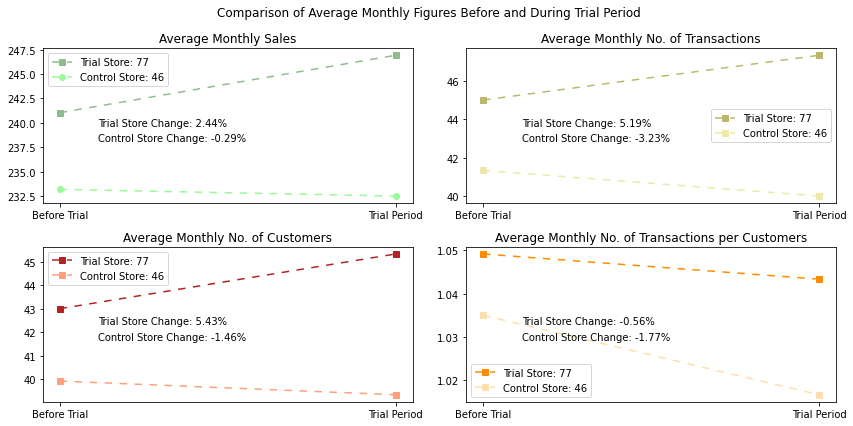

In [93]:
plot_avg_chng(77, 46)
plt.savefig('D:\\ProjectQuantium\\Plots\\AvgCompare77-46.jpeg',bbox_inches='tight')

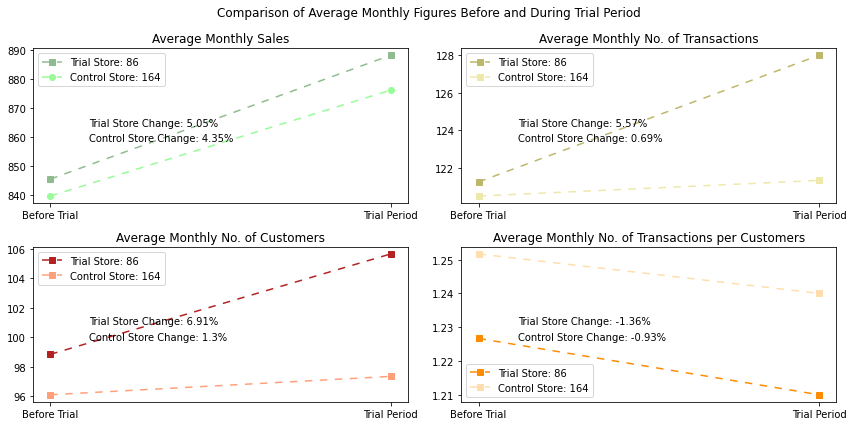

In [94]:
plot_avg_chng(86, 164)
plt.savefig('D:\\ProjectQuantium\\Plots\\AvgCompare86-164.jpeg',bbox_inches='tight')

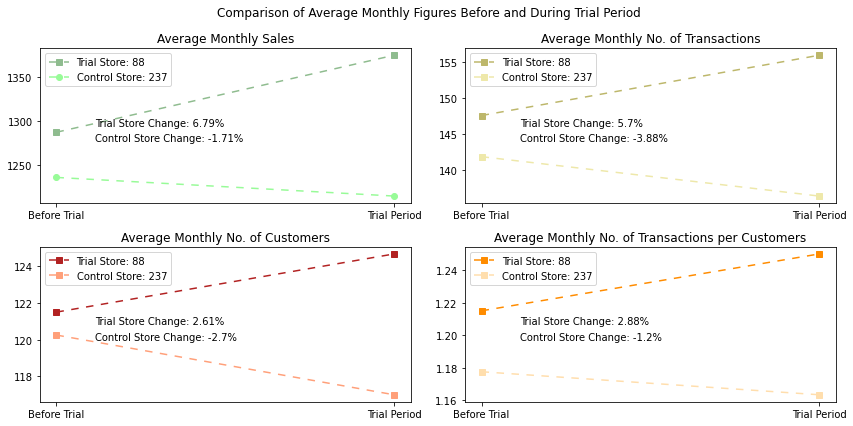

In [95]:
plot_avg_chng(88, 237)
plt.savefig('D:\\ProjectQuantium\\Plots\\AvgCompare88-237.jpeg',bbox_inches='tight')